# Proyecto

## Introducción.

Ecobici es el sistema de bicicletas compartidas de la ciudad de México, auspiciado por el gobierno estatal de la CDMX.

El sistema Ecobici es un sistema que tiene poco más de un una decada que comenzó, inició en el año 2010 con cerca 84 cicloestaciones y 1,200 bicicletas, al día de hoy cuenta con 687 estaciones y más de 9,300 bicicletas para su disposición. Trece años y una pandemía después, gracias a la gran demanda del servicio así como de la infraestructura; en agosto del 2022 el gobierno de la ciudad de méxico decidió hacer un cambio en el sistema ecobici, con la renovación de infraestructura, gestión y servicio.

## Objetivo

El objetivo de este trabajo es vislumbrar el estatus actual del nuevo sistema. Este nuevo sistema ha traído demasiados cambios, ya que no solo se renovaron las bicis, sino las estaciones de carga, algunas de estas estaciones no están en uso pues están siendo  renovadas para ser compatibles con el nuevo proyecto.

Dada la problemática de la transición y el graudal aumento de la demanda, en dicho trabajo se presenta un análisis del sistema actual con el fin de tomar mejores decisiones sobre el rumbo y la gestión del mismo, para esto se va a abordar los siguientes puntos que creemos son importantes si es que se quiere 


- Predición de la demanda
- Prevalencia del genero masculino y tendencia del femenino
- Segmentación de las estaciones por sectores
- Identificación de estaciones de dificil acceso
- Segmentación e indentificación de estaciones críticas

Esta preguntas son de vital importancia pues con estas podemos ver que tan exitoso es el sistema y con la predicción la gestión se facilitaría, pues podríamos sensar si la infraestructura y los recursos actuales son suficientes.

Por otro lado, la Ciudad de México en sus campañas más recientes ha implementado muchos programas enfocados en la mujer y queremos ver cómo es que la proporción de usuarias ha evolucionado y si es que las mujeres se sienten comodas usando el sistema. En este punto sólo se busca un bosquejo general respecto a la problemática con tal de hacerle frente con alguna campaña que promueva el sistema.


En lo que respecta a los puntos de las estaciones, es más que claro que conocer bien como se van desarrollando las estaciones es de mucha ayuda para la adminstración del sistema, ya que así se pueden enfocar esfuerzos en puntos críticos, atender problemas de conectividad, incluso este conocimientos nos podrías ayudar a planificar la extensión del sistema a las demás zonas de la ciudad. Este último punto de la extensión del sistema es de suma importancia, pues  ya que según la última encuesta del 2020 Ecobicis la principal problemática del sistema es que no se ha extendido a otras zonas 



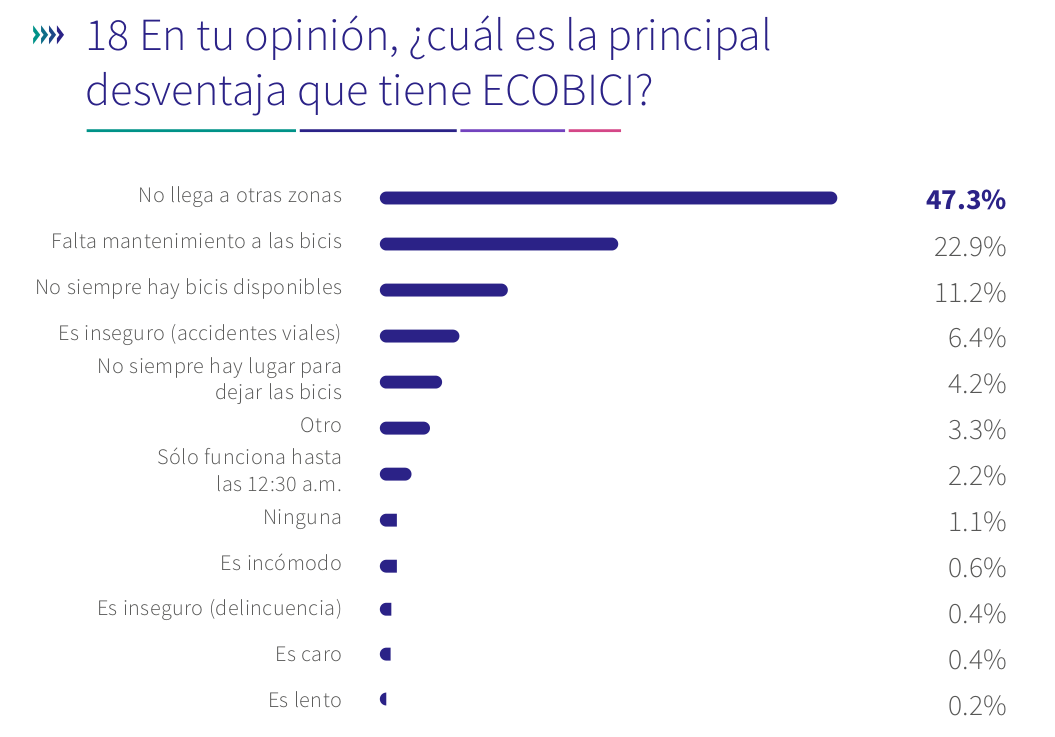






## Desarrollo

### Carga de módulos

In [ ]:
# Misc
from warnings import filterwarnings

# Data wrangling
import json as js
import numpy as np
import pandas as pd
from pandarallel import pandarallel
import dask.dataframe as dd
import requests
import os
from sqlalchemy import create_engine, text# este es para concectarnos a una base de datos
import math
import datetime
import missingno as msno
import matplotlib.pyplot as plt

# Data viz
import cufflinks as cf
from sklearn import set_config
from PIL import Image
# Preprocesamiento
from sklearn.pipeline import Pipeline # vamos a utilizar tuberías
from sklearn.impute import SimpleImputer # imputación simple
from sklearn.preprocessing import MinMaxScaler # Escala
from sklearn.preprocessing import MaxAbsScaler # Escala
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Enviroment setup
cf.go_offline()
filterwarnings("ignore")
set_config(display='diagram')
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

pandarallel.initialize()

Función que nos van ayudar a indentificar el número de lineas que tenemos, así como si las variables tienen nulos y en qué proporción se encuentran estos

In [ ]:
def info_primer_vistazo(df_name,df):
    print('Las dimensiones del DataFrame {} son {}'.format(df_name,df.shape))
    
    
    tab_info = pd.DataFrame(df.dtypes).T.rename(index={0: 'column type'})
    
    
    null_info = pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'null values (nb)'})
    tab_info = pd.concat([tab_info, null_info])
    
    null_percentage_info = pd.DataFrame(df.isnull().sum() / df.shape[0] * 100).T.rename(index={0: 'null values (%)'})
    tab_info = pd.concat([tab_info, null_percentage_info])
    
    display(tab_info)
    
    display(df.head())

### Data Estructure


En el presente proyecto se busca trabajar con los datos públicos del sistema ecobici. Los datos pueden ser obtenidos de lo siguientes links.

https://ecobici.cdmx.gob.mx/datos-abiertos/https://ecobici.cdmx.gob.mx/datos-abiertos/

De esta liga podemos obtener la información de ambas tablas, la información de las estaciones puede ser consultada sin necesidad de descargar la información, por medio de una api se puede acceder y consultar la información perfectamente

Sin embargo, la información de los viajes sólo puede ser consultada una vez que se descarga. A continucación un pequeño diagrama que ilustra la relación entre las diferentes tablas.


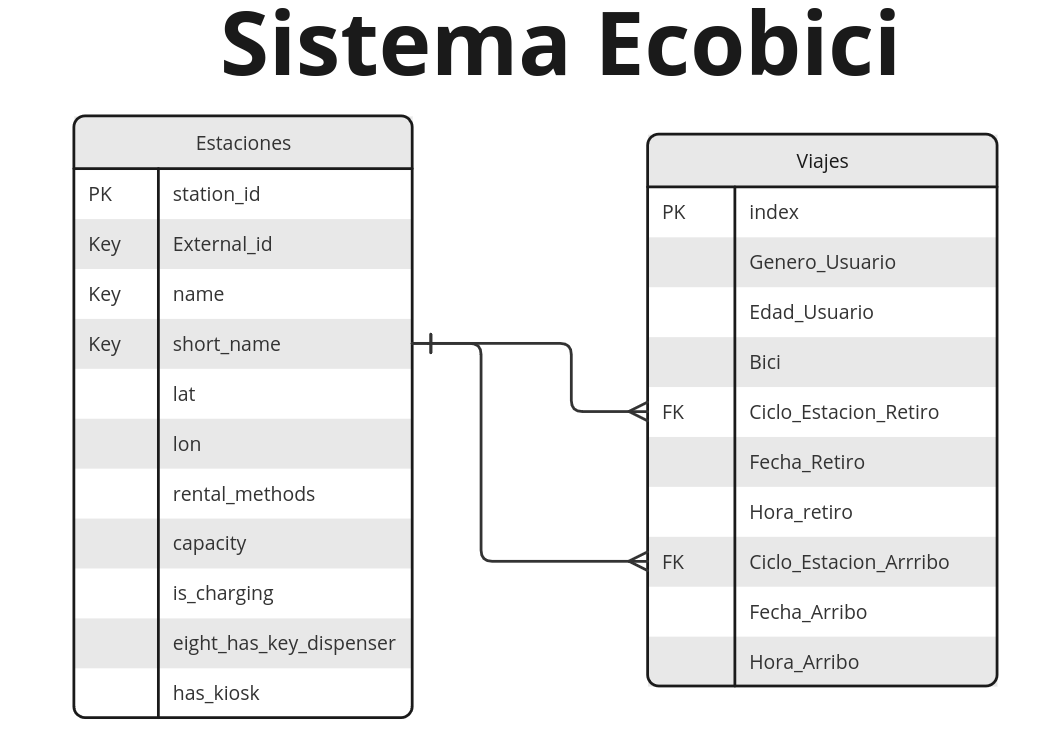

Nota: A pesar de que las tablas no son una base de datos en extricto sentido, porque no cuentan con estructura, llaves primarias, secundarias, tablas entidad-relación ni otros elementos importantes para considerar a los datos como una base de datos, la información se presenta así para poder tener una mayor compresión de como es que se relacionan las tablas y algunas atributos de los que se dispone.

### Diccionario de Datos

#### Tabla Viajes

Esta es nuestra tabla prinicpal en la que se registran los datos de cada viaje de la manera más atómica posible, y se cuenta con los siguientes atributos como lo son, índice, datos del usuario; dentro de los que se ecuentra el género, y datos del viaje, la bici que se utilizó para el viaje, de qué estación se retiró, la fecha del retiro, así como la hora; y exactamente la misma información para el arribo.

#### Tabla Estaciones

Esta tabla contiene información sobre las estaciones que están adapatadas al nuevo sistema. así como su ubicación geográfica y sus caracteristicas relevantes.
**En esta tabla sólo se cuenta con las estaciones que están adaptadas para el nuevo sistema**.



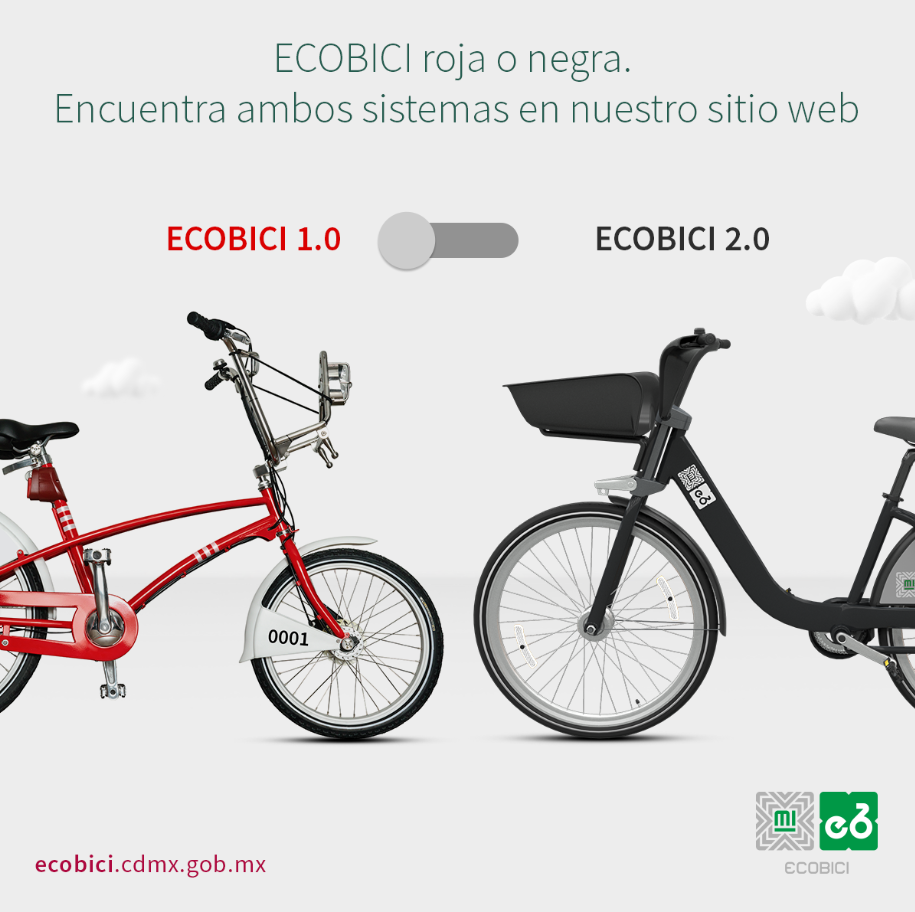

## Lectura de datos

### Estaciones

En la siguiente tabla se muestra una porción de los datos que se pueden observar en el catálogo de estaciones


In [ ]:
#Definimos el hipervinculo de dónde se puede obtener la información de las estaciones
url = "https://gbfs.mex.lyftbikes.com/gbfs/es/station_information.json"

response = requests.get(url)
json_data = response.json()

estaciones_json = json_data["data"]["stations"]

df_estaciones = pd.json_normalize(estaciones_json)

df_estaciones.head(5)

In [ ]:
info_primer_vistazo("Estaciones",df_estaciones)

Hasta el 22 de noviembre contabamos con 571 estaciones, con la actualización del 25 de diciemebre tenemos 619, con la ultima acctualización tenemos un total de 638 estaciones. Con esta última actualización contamos con menos de las 687 estaciones que se reporta, tenía el sistema anterior, con lo que sabemos que cada vez quedan menos estaciones que adaptar para que el sistema esté totalmente homologado.

### Viajes

Ahora importaremos lo que son los registros por viaje, para el poryecto no tomaremos información de los primeros dos meses de puesta en producción del nuevo sistema ya que estos datos no son de tan buena calidad, tienen muy poca información y los datos almacenados para tales meses son muy inconsistentes respecto a los meses subsecuentes que se ha tenido más orden a la hora del registro.

In [ ]:
def get_file_names(directory):
    file_names = []
    for file in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file)):
            file_names.append(file)
    return file_names

directory_path = "../Datos/Proyecto/Insumos"

file_names = get_file_names(directory_path)
file_names.remove('ecobicis_20230430.csv')

De los que obtenemos la siguiente información:

In [ ]:
df_viajes = pd.DataFrame()
for file in file_names:
        temp= pd.read_csv(directory_path+"/"+file, sep=",", encoding="utf-8",names=['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo',
       'Hora_Arribo'])
        
        #print(temp.columns)
        df_viajes = pd.concat([df_viajes, temp], ignore_index=True)
df_viajes=df_viajes.iloc[1:]

In [ ]:
info_primer_vistazo("Viajes",df_viajes)

Tenemos missings en sólo dos variables, los vamos a eliminar porque son muy pocos

In [ ]:
df_viajes = df_viajes.dropna()

**Nota: Las estaciones tienen etiquetas de tres dígitos**

In [ ]:
df_viajes.tail()

In [ ]:
pd.DataFrame(df_viajes["Ciclo_Estacion_Arribo"].unique(), columns=["Ciclo_Estacion"])

In [ ]:
pd.DataFrame(df_viajes["Fecha_Retiro"].unique(), columns=["Fecha_Retiro"])

In [ ]:
pd.DataFrame(df_viajes["Fecha_Arribo"].unique(), columns=["Fecha_Arribo"])

#### Tratamiento de la fecha

In [ ]:
unique_registers = pd.DataFrame(df_viajes["Fecha_Arribo"].unique(), columns=["Fecha_Arribo"])

pd.set_option('display.max_rows', None)

display(unique_registers.iloc[:])

In [ ]:
pd.reset_option('display.max_rows')
df_viajes.info()

#### Limipeza de la tabla viajes

In [ ]:
#Quitamos los registros que son la cabecera de los datos
df_viajes.drop(df_viajes[df_viajes["Bici"]=="Bici"].index, inplace=True) 
df_viajes[df_viajes["Bici"]=="Bici"]
df_viajes=df_viajes.reset_index()
df_viajes=df_viajes.drop("index", axis=1)

In [ ]:
#Transformamos la fecha y ordenamos por la misma
df_viajes["Fecha_Retiro"] = pd.to_datetime(df_viajes["Fecha_Retiro"], format='%d/%m/%Y')
df_viajes["Fecha_Arribo"]=pd.to_datetime(df_viajes["Fecha_Arribo"],format='%d/%m/%Y')

df_viajes = df_viajes.sort_values(by='Fecha_Retiro', ascending=True)
df_viajes=df_viajes.reset_index()
df_viajes=df_viajes.drop("index", axis=1)
df_viajes

Vamos a imprimir todas las posibles fechas que tenemos

In [ ]:
fechas_unicas = pd.DataFrame(df_viajes["Fecha_Arribo"].unique(), columns=["Fecha_Arribo"])

pd.set_option('display.max_rows', None)

display(fechas_unicas.iloc[:])

In [ ]:
pd.set_option('display.max_rows',False)
pd.DataFrame(df_viajes["Fecha_Retiro"].unique(), columns=["Fecha_Retiro"])

Un marco de datos de más de trece millones de viajes repartidos  de los que se tiene información a partir de octubre 2022.

Por otro lado, de este mismo ordenamiento tenemos muchos missing values que parece ser que se repiten en varias columnas.

De una descripición de la tabla obtenemos que;

In [ ]:
info_primer_vistazo("Viajes",df_viajes)

In [ ]:
df_viajes.describe()

Nota: Observemos que nuestro primer registro de la columna fecha retiro es de agosto del 2022, mientras que para la columna de fecha arribo es de octubre del 2022, de lo que se deduce que; en la página de datos abierto, donde la información utilizada para la tabla viajes es separada por meses, esta se separa por de la fecha arribo de los viajes, más no por la de retiro.

### Ecobicis

Ahora vamos a exportar información de las nuevas bicicletas de Ecobici. Esto para poder discernir entre los viajes con las nuevas bicicletas y las antiguas. De lo que se desprende la siguiente tabla con los registros y la información de la que se dispone.


NOTA: ESTO LO HACIAMOS ANTES DE QUE NOS DIÉRAMOS CUENTA DE QUE AL METER ESTE FILTRO CORTAMOS MUCHA INFORMACIÓN, YA QUE NOS OLVIDAMOS DE LA INFROMACIÓN DE LA NUEVAS BICIS INSERTADAS A PARTIR DEL 04 DEL 2023

In [ ]:
ecobicis_df= pd.read_csv("../Datos/Proyecto/Insumos/ecobicis_20230430.csv", sep=",", encoding="utf-8")
ecobicis_df
pd.set_option('display.max_rows',False)

In [ ]:
ecobicis_df

Gracias a la tabla anterior podemos observar que las nuevas ecobicis están etiquetadas por un código de 7 dígitos numéricos y un guión intermedio.

## Tratamiento de los datos

Las tablas que presentamos anteriormente carecen de calidad, por lo que en este espacio se busca darle un poco más de sentido a los datos presentados.

### Viajes

El problema que tenemos con las columnas de estaciones en la tabla viajes es que no está apuntando a la llave principal (station_id), sino que a otra llave que se llama (short_name). Por lo que vamos a ajustar esa información y aprovecharemos para cruzar la información con la tabla estaciones y disernir a las estaciones que pueden albergar el nuevo sistema.

#### Cruce con Estaciones

In [ ]:
df_viajes = df_viajes.merge(df_estaciones[["short_name","station_id"]].rename(columns={"short_name":"Ciclo_Estacion_Retiro"}), on="Ciclo_Estacion_Retiro", how="left").merge(df_estaciones[["short_name","station_id"]].rename(columns={"short_name":"Ciclo_Estacion_Arribo"}), on="Ciclo_Estacion_Arribo", how="left").reset_index()
df_viajes

Vamos a filtrar por los valores que sean diferenetes a NaN de las columnsa station_id_x(Estacion de retiro) y de la columna station_id_y(Estación de arribo).

La siguiente tabla sólo nos ayuda a corroborar que no tenemos NaN en las columnas de Ciclo_Estacion_Retiro y Ciclo_Estacion_Arribo antes de que eliminemos los registros con valores ausentes de las columnas stations.

In [ ]:
df_viajes[["Ciclo_Estacion_Retiro","Ciclo_Estacion_Arribo"]].isnull().mean().sort_values(ascending=True).to_frame().head(5)


Comprobamos que no tenemos valores ausentes y sustituimos las columnas de estaciones de arribo y de retiro por $station_id_x$ y $station_ id_y$ respectivamente.

In [ ]:
df_viajes["Ciclo_Estacion_Retiro"]=df_viajes["station_id_x"]
df_viajes["Ciclo_Estacion_Arribo"]=df_viajes["station_id_y"]
df_viajes=df_viajes.drop(["station_id_x","station_id_y"], axis=1).dropna(subset=["Ciclo_Estacion_Retiro","Ciclo_Estacion_Arribo"])

De lo que obtenemos la siguiente información.

In [ ]:
df_viajes=df_viajes.reset_index().drop(["index","level_0"],axis=1)
df_viajes

En la tabla anterior observamos los datos que están filtrados por las estaciones en operación, pasaron de ser 12.03 millones de registros a 12 millones. De la tabla actual vamos a aplicar otro filtro, el de las biciletas que se tienen registradas como las del nuevo sistema (bicicletas negras).

NOTA: ESTO LO HACIAMOS ANTES DE QUE NOS DIÉRAMOS CUENTA DE QUE AL METER ESTE FILTRO CORTAMOS MUCHA INFORMACIÓN, YA QUE NOS OLVIDAMOS DE LA INFROMACIÓN DE LA NUEVAS BICIS INSERTADAS A PARTIR DEL 04 DEL 2023

#### Cruce con Ecobicis

**Bicis en la tabla viajes**

De la tabla de viajes tenemos los siguientes datos en bicis.

In [ ]:
pd.DataFrame(df_viajes["Bici"].unique(), columns=["Bici"])

**Bicis en la tabla ecobicis**

Tenemos registros que se reparten más de 16 mil bicis diferentes, ahora veremos cuántas tenemos en la tabla ecobicis.

In [ ]:
pd.DataFrame(ecobicis_df["bici"].unique(), columns=["Bici"])

Del nuevo sistema tenemos poco más de cuatro mil bicis (información desactualizada). Además, el registro de las bicis tiene diferente formato, ya que en el data frame Ecobici todos los registros tienen un guión intermedio, mientras que en la tabla viajes no tenemos registros con guiones. Por lo que cruzaremos la información y sólo nos quedaremos con viajes del nuevo sistema.
Trasformando los datos de tal manera que la columna Bici esté homologada con su homónimo de la tabla ecobicis.


Ya no vamos a utilizar la información de la tabla ecobicis porque esta información está desactualizada.

In [ ]:
df_viajes['Bici'] = df_viajes['Bici'].astype(str)
df_viajes['Bici'] = df_viajes['Bici'].str[:3] + '-' + df_viajes['Bici'].str[3:]
df_viajes.head(3)

#### Missings

Teniamos nulos sólo sobre dos variables y eran tan pocos los eliminamos

In [ ]:
df_viajes.isnull().sum()

#### Género de los usuarios

In [ ]:
df_viajes.Genero_Usuario.value_counts([1])

In [ ]:
#Sustiituimos los signos de interrogación con O, de otros
df_viajes["Genero_Usuario"].replace('?', 'O', inplace=True)

In [ ]:
Masculino = df_viajes[df_viajes['Genero_Usuario']=="M"]['Genero_Usuario'].value_counts()
Femenino = df_viajes[df_viajes['Genero_Usuario']=="F"]['Genero_Usuario'].value_counts()
Otro = df_viajes[df_viajes['Genero_Usuario']=="O"]['Genero_Usuario'].value_counts()
Viajes_genero = pd.DataFrame([Masculino,Femenino,Otro])
Viajes_genero.index = ['Masculino','Femenino',"Otros"]
Prop_Masculino=Viajes_genero.sum()[0]/Viajes_genero.sum().sum()
print("la proporción de viajes hechos por el género Masculino es: " +f"{Prop_Masculino*100:.2f}%")
Viajes_genero.iplot(kind='bar',barmode='stack', title='Frecuencia de los viajes por género')

#### Edad de los usuarios

In [ ]:
df_viajes.info()

In [ ]:
import plotly.express as px
fig = px.histogram(df_viajes, x="Edad_Usuario", title= "Histograma de los usuarios")
fig.show()

Filtramos por los que son menores a 100 años, que tenemos valores que cláramente no son reales

In [ ]:
del ecobicis_df

In [ ]:
df_viajes["Edad_Usuario"] = df_viajes["Edad_Usuario"].astype(int)
df_viajes = df_viajes[df_viajes["Edad_Usuario"]<=100] 

#### Viajes por día

In [ ]:
fechas=pd.DataFrame()
fechas['Fecha'] = df_viajes.Fecha_Retiro #.dt.strftime('%Y %B')

fecha=fechas.groupby('Fecha').value_counts().reset_index()
fecha.iplot(x='Fecha', y=fecha.columns[1], mode='markers', theme='ggplot', title='Viajes por día (Retiro)')

In [ ]:
fechas=pd.DataFrame()
fechas['Fecha'] = df_viajes.Fecha_Arribo #.dt.strftime('%Y %B')

fecha=fechas.groupby('Fecha').value_counts().reset_index()
fecha.iplot(x='Fecha', y=fecha.columns[1], mode='markers', theme='ggplot', title='Viajes por día (Arribo)')

La gráfica se ve terrible para los últimos días de diciembre, particularmente en navidad... tenemos un decremento significativo, justo como se observó el año pasado, pero con mucho menor impacto. En diciembre del 2022 el mímimo se alcanzó en dos mil viajes, mientras que el 2023 se alcanzó el once mil, cinco veces más usuarios que el año pasado. En cuanto a la demanda habitual, esta pasó de 20 mil en su punto más alto del 2022 a 60 mil en su punto de mayor demanda del 2023, un aumento del 200%.

##### Viajes de que empiezan un día y terminan otro

In [ ]:
ratio = 1- df_viajes[df_viajes["Fecha_Retiro"]==df_viajes["Fecha_Arribo"]].shape[0]/df_viajes.shape[0]

print(f"{ratio*100:.3f}%" + " es el porcentaje de viajes que empiezan un día y terminan otro")

#### Evolución de la proporción del género

In [ ]:
viajes_dia_genero = df_viajes.groupby(['Fecha_Retiro', 'Genero_Usuario']).size().reset_index(name='Viajes')

pivot_genero = viajes_dia_genero.pivot_table(index='Fecha_Retiro', columns='Genero_Usuario', values='Viajes', fill_value=0)

pivot_genero['Total'] = pivot_genero.sum(axis=1)

In [ ]:
import plotly.graph_objects as go


proporciones_pivot_genero = pivot_genero.drop('Total', axis=1).div(pivot_genero['Total'], axis=0)

plot_genero = go.Figure()

for genero in proporciones_pivot_genero.columns:
    plot_genero.add_trace(go.Scatter(x=proporciones_pivot_genero.index, y=proporciones_pivot_genero[genero],
                             mode='lines', stackgroup='one', name=genero))

plot_genero.update_layout(title='Proporción relativa de los géneros a través del tiempo',
                  xaxis_title='Fecha',
                  yaxis_title='Proporción relativa')

plot_genero.show()

In [ ]:
tendecia_mujeres = pd.DataFrame(proporciones_pivot_genero["F"].values,index = range(proporciones_pivot_genero.shape[0]), columns = ["Proporcion Mujeres"])

Vamos a hacer una pequeña regresión para ver cómo es la tendencia en la proporción de mujeres que usan el sistema

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
#Definimos a X como la secuencia de días
X = tendecia_mujeres.index
X = np.array(X).reshape(-1, 1)
#Definimos a X como la secuencia de días
y = tendecia_mujeres.values
#Aplicamos la regresión e interpretamos
reg = LinearRegression().fit(X, y)
print(f"{float(reg.coef_)*100:.3f}" + " es la tendencia de del porcentaje de mujeres a través del tiempo, esta es positiva, pero casi cero")

#### Concluiones a partir del tratamiento de los datos

Después de la limpieza del data frame "viajes" podemos concluir lo siguiente:

    
    - La tabla ecobicis nos ayudaba a distinguir entre las bics que pertenecìan al viejo sistema y al nuevo sistema, sin embargo, la tabla ecobicis no se actualiza desde mayo de el año 2023, por lo que tampoco contempla a las nuevas bicis que se han agregado al sistema a partir de esa fecha, por eso es que hemos decidido ya no incluir esta tabla, si en un principio nos ayudaba a disernir, ahora nos está perjudicando.
    
    - De las 13 mil bicis que tiene el sistema, sólo 4 mil de ellas se presentaron en la tabla ecobici, otra razón más para ya no usar la tabla ecobicis, no tiene información actualizada.
    
    - Se tienen muy pocos nulos y sólo en las variables genero usuarios y edad usuario, estos se van a eliminar.
    
    - El 70% de los viajes son realizados el género Masculino. Pero cómo se ha visto afectada esta proporción a lo largo del tiempo, ¿Más mujeres han usado el sistema o sigue siendo abarcado en su mayoría por hombres?... con la regresión lineal que implementamos observamos como la tendencia de la proporción de mujeres a lo largo del tiempo sí es un número que va creciendo, pero es tan ínfimo que es casi nulo el crecimiento.
    
    - Más del 99% de los viajes se terminan el mismo día. Esto va en línea con la resticción de que los viajes sólo puedan durar a lo sumo 40 minutos.
    
    - Se tiene una clara tendencia en el número de viajes que se realizan, tal como observamos en las gráficas; los fines de semana se tiene una menor demanda del sistema, lo que significaría que el sistema prinicpalmente se utiliza como medio de transporte en la vida cotidiana, llegar al trabajo o hacer tareas periódicas. Esta información está respaldada por información de la encuesta 2020.

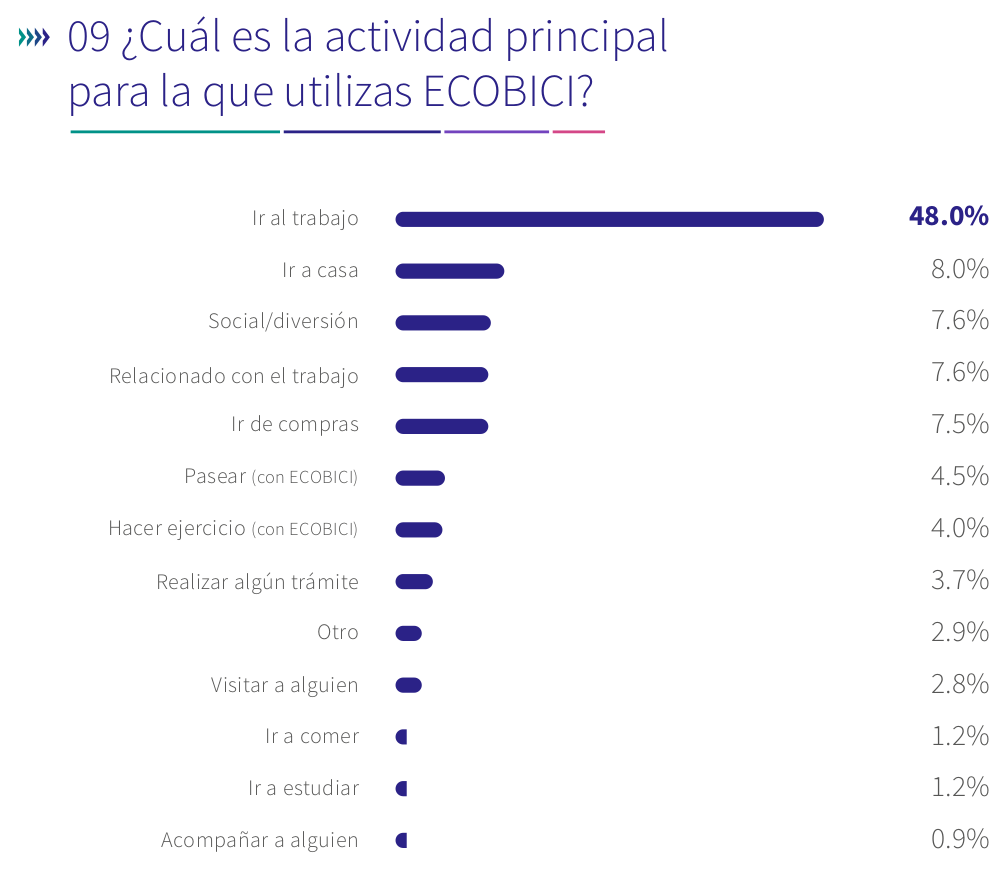
    
    - Otra cosa interesente es que a pesar de que entre semana es cuando se tiene mayor afluencia en el sistema, el género Femenino prefiere usar más el sistema los fines de semana, lo que nos da un claro indicio de que el fin de semana se utiliza como medio recreativo y aquí es cuando las mujeres están más dispuestas a salir en bicicleta.

# Generacaión de variables

Esta parte del proyecto simplemente buscar explorar los datos con los que se cuenta para ver si algo más se puede contruir con el fin de que nos ayuden a responder inquietudes sobre el sistema y cómo es que este se está desarrollando.

### Viajes

Lo que queremos calcular es lo siguientes
    
    -Tiempo de uso
    
    -Si el día en el que se solicitó el servicio fue fin de semana
    
Esta variables que acabamos de definir tienen como objetivo delimitar más nuestros datos y ayudarnos a encontrar valores atípicos. Además, si queremos estudiar lo que es la demanada del sistema y cómo este se está desarrollando necesitamos una variable que nos ayude a diferenciar los fines de semana de los otros días.

Primero vamos a cambiar todas estas variables que son categóricas a ese tipo, para guardar memoria

In [ ]:
ls_disc = ['Genero_Usuario', 'Edad_Usuario', 'Bici','Ciclo_Estacion_Retiro','Ciclo_Estacion_Arribo']

for v in ls_disc:
    df_viajes[v] = df_viajes[v].astype("category")

#### Distancia entre Estaciones

Obteniendo la distancia en kilómetros entre la estación de retiro y de arribo. ESTO LO DESARROLLAMOS PORQUE CREIMOS QUE SERÍA UTIL, PERO LA VERDAD ES QUE LA DISTACIA ENTRE ESTACIONES NO ES UNA BUENA MÉTRICA PARA PORDER CALCULAR LA DISTANCIA QUE SE REALIZÓ EN EL VIAJE, PORQUE LOS USUARIOS NO VAN EN LINE RECTA DE UN LUGAR A OTRO.

In [ ]:
#Agregamos las latitudes y las longitudes de las estaciones a cada uno de los registros de los viajes

#df_viajes = df_viajes.merge(df_estaciones[["station_id", "lat", "lon"]].rename(columns={"station_id": "Ciclo_Estacion_Retiro"}), on="Ciclo_Estacion_Retiro", how="left")
#df_viajes = df_viajes.merge(df_estaciones[["station_id", "lat", "lon"]].rename(columns={"station_id": "Ciclo_Estacion_Arribo"}), on="Ciclo_Estacion_Arribo", how="left")
#df_viajes.sample(5)

In [ ]:
df_viajes.sample()

#### Duración del viaje

Antes de calcular esta variable, queremos ver que formato tienen estas columnas y si es homogenea para todos los registros.

In [ ]:
df_viajes[["Hora_Retiro","Hora_Arribo"]].info

##### Homologación de los distintos formatos de hora

Tenemos registros que solo toman en cuenta los horas, minutos y segundos, mientras que tenemos otros toman en cuenta la hora las proporciones de los segundos, no queremos la información tan atómica.

In [ ]:
def convert_time(time_str):
    if len(time_str.split(':')) == 2:
        time_str = '00:' + time_str + '000'
    return(time_str[0:8])

df_viajes["Hora_Retiro"] = df_viajes["Hora_Retiro"].apply(convert_time)
df_viajes["Hora_Arribo"] = df_viajes["Hora_Arribo"].apply(convert_time)


In [ ]:
df_viajes[["Hora_Retiro","Hora_Arribo"]].info

In [ ]:
df_viajes[["Hora_Retiro","Hora_Arribo"]].sample(1)

Transformamos los tipos de variables para optimizar el tamaño de nuestros objetos

In [ ]:
ls_features = ['index', 'Genero_Usuario', 'Edad_Usuario', 'Bici',
       'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro',
       'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']#,'lat_x',
       #'lon_x', 'lat_y', 'lon_y']
ls_id = ["index"]
ls_cont = ['lat_x','lon_x', 'lat_y', 'lon_y']
ls_date = ['Fecha_Retiro', 'Hora_Retiro','Fecha_Arribo', 'Hora_Arribo']
len(ls_features),len(ls_id+ls_cont+ls_disc+ls_date)

In [ ]:
df_viajes["Hora_Retiro"] = df_viajes["Hora_Retiro"].astype(str)
df_viajes["Hora_Arribo"] = df_viajes["Hora_Arribo"].astype(str)

In [ ]:
df_viajes

In [ ]:
df_viajes.info()

Dropeamos el genero y la edad del usuario, porque son variables que no volveremos a tocar

In [ ]:
df_viajes.drop(columns=["Genero_Usuario","Edad_Usuario","Bici"],inplace=True)

In [ ]:
df_viajes["Retiro"] = pd.to_datetime( df_viajes["Fecha_Retiro"].astype(str) + " "+ df_viajes["Hora_Retiro"],format = "%Y-%m-%d %H:%M:%S")

In [ ]:
df_viajes["Arribo"] = pd.to_datetime( df_viajes["Fecha_Arribo"].astype(str) + " "+ df_viajes["Hora_Arribo"],format = "%Y-%m-%d %H:%M:%S")

Tambíen eliminaremos el arribo por ser información duplicada para nuestro trabajo, sólo queremos la información a nivel día y ya vimos que cai todos los viajes empiezan y terminan el mismo día.

In [ ]:
df_viajes.drop(columns=["Fecha_Arribo","Hora_Arribo","Hora_Retiro"],inplace=True)

##### Duración del viaje

In [ ]:
df_viajes['Mins_viaje'] = (df_viajes['Arribo'] - df_viajes['Retiro']).dt.total_seconds() / 60

In [ ]:
df_viajes[df_viajes['Mins_viaje']>45].count()[0]

In [ ]:
df_viajes['Mins_viaje'].describe(np.arange(.1,1,.01))

Vamos a olvidarnos de los registros que duraron más de 3 horas en devolver el equipo porque se sale del movimimiento ordinario del servicio

In [ ]:
df_viajes[df_viajes['Mins_viaje'] > 3*60].count()[0]

In [ ]:
df_viajes = df_viajes[df_viajes['Mins_viaje'] < 3*60]

A pesar de que el sistemma tienen cómo límite viajes de 45 min, existen personas que ocupan el servicio por incluso más tiempo. Pues tenemos datos de hasta 304,753 min (los cuáles cláramente son datos atípicos). Anuque tenemos que menos del 99% no exceden los 99 min.

#### El día es fin de semana

In [ ]:
df_viajes['Es_Fin_de_semana'] = df_viajes['Fecha_Retiro'].dt.dayofweek // 5

### Generación de la tabla viajes por día.

In [ ]:
df_viajes.columns

In [ ]:
df_viajes.sample()

In [ ]:
demanda_df = df_viajes.groupby(['Fecha_Retiro','Es_Fin_de_semana']).size().reset_index(name='Viajes')
demanda_df.index = demanda_df.Fecha_Retiro
demanda_df = demanda_df.drop("Fecha_Retiro",axis=1)

#### Generación de variables a partir de la demanda
Vamos a crear las siguientes variables sobre nuestro data frame de la demanda.

In [ ]:
pandarallel.initialize()

for variable in ["Viajes"]:
    for i in range(1, 7):
        demanda_df[f"{variable}_t-{i}"] = demanda_df[variable].shift(i) # Obtiene la demanda del día de íesimo anterior
        demanda_df[f"{variable}_diff_{i}"] = demanda_df[variable].diff(i) # Calcula la diferencia entre las demandas del día actual con íesimo anterior
        demanda_df[f"{variable}_pct_{i}"] = demanda_df[variable].pct_change(i+1) # Calcula el porcentaje de cambio entre hoy y el íesimo anterior
        demanda_df[f"{variable}_ma_{i+1}"] = demanda_df[variable].rolling(i+1).mean() # Calcula la media móvil entre los íesimos datos anteriores
        demanda_df[f"{variable}_min_{i+1}"] = demanda_df[variable].rolling(i+1).min() # Calcula el mínimo móvil entre los íesimos datos anteriores
        demanda_df[f"{variable}_max_{i+1}"] = demanda_df[variable].rolling(i+1).max() # Calcula el máximo móvil entre los íesimos datos anteriores
        demanda_df[f"{variable}_std_{i+1}"] = demanda_df[variable].rolling(i+1).std() # Calcula la desviación estándar móvil entre los íesimos datos anteriores
        demanda_df[f"{variable}_median_{i+1}"] = demanda_df[variable].rolling(i+1).median() # Calcula la mediana movil los íesimos datos anteriores

In [ ]:
demanda_df["Viajes_t+7"] = demanda_df["Viajes"].shift(-7) # Obtiene la demanda de siete días después
demanda_df["Viajes_siguiente_dia_es_fin_de_semana_t+1"] = demanda_df['Es_Fin_de_semana'].shift(-1)

Eliminamos los primero registros porque están llenos de vaciós, esto por como se construyó demanada_df

In [ ]:
demanda_df.isna().sum().sort_values()[-8:]

In [ ]:
demanda_df.iloc[7:-1,:].isna().sum().sort_values()[-2:]

In [ ]:
np.isinf(demanda_df).sum().sort_values().tail(2)

In [ ]:
demanda_df

In [ ]:
msno.matrix(demanda_df)

In [ ]:
demanda_df = demanda_df.iloc[7:-1,:]

Bloqueamos esta linea porque queremos predecir información de los dìas que no tienen info de + 7 días en adelante

Selección de nuestra 

In [ ]:
demanda_df[["Viajes","Viajes_t+7"]].tail(8)

#### Train test split

In [ ]:
demanda_df.columns

In [ ]:
demanda_df

Creamos una columna adicional en el data frame de demanda_df, esta columna nos va a ayudar la fecha de la cuál estamos prediciendo el número de viajes

In [ ]:
from datetime import timedelta

#El ínidice corresponde a la fecha de Viajes, mientras que Fecha predición se refiere a la fecha en la que se espera 
# observar Viajes_t+7
demanda_df["Fecha predicción"] = demanda_df.index + timedelta(days =7)

In [ ]:
demanda_df[["Viajes","Viajes_t+7","Fecha predicción"]].head(8)

Aplicamos el train test split, queremos entrenar con toda la información antes del 01 de julio de 2023

In [ ]:
#X=demanda_df.loc[:, demanda_df.columns != ["Viajes_t+1","Viajes"]]
X = demanda_df.drop(columns=["Viajes_t+7","Fecha predicción"]) 
y = demanda_df[["Viajes_t+7"]]


#Dvidimos por fechas para que siempre se entrene con los datos antes de julio
fecha_corte = "2023-07-01"
X_train =  X[X.index < fecha_corte]
y_train = y[y.index < fecha_corte]

X_test =  X[X.index >= fecha_corte]
y_test =  y[y.index >= fecha_corte]

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, shuffle = False)

Agregamos la normalización(escalamos) a nuestras variables.

In [ ]:
sc_x = MinMaxScaler()

In [ ]:
sc_y = MinMaxScaler()

In [ ]:
X_train = sc_x.fit_transform(X_train)

In [ ]:
X_test = sc_x.transform(X_test)

In [ ]:
y_train = sc_y.fit_transform(y_train)

In [ ]:
y_test = sc_y.transform(y_test)

Aplicamos ub Select K best para escoger las 50 mejores variables predictoras

In [ ]:
kb = SelectKBest(k = 50, score_func= f_regression)
kb.fit(X_train,y_train)

In [ ]:
X_train = kb.transform(X_train)
X_test = kb.transform(X_test)

## Predicción de la demanda

### K vecinos más cercanos

In [ ]:
def metricas_regresion(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
Knn=KNeighborsRegressor(n_jobs=-1,n_neighbors=10)
Knn.fit(X_train,y_train)

Para testear el modelos generamos la métricas de ajuste con todos los datos de test excepto los ùltimos siete datos, porque de esos datos no tenemos el número de viajes reales realizados

In [ ]:
y_test = y_test[:-6]
#y_test.iloc[:-6,:]

In [ ]:
y_test.shape

In [ ]:
X_test = X_test[:-6,:]

In [ ]:
X_test.shape

In [ ]:
print("Las métricas para el conjunto de entremiento son: ")
metricas_regresion(y_train,Knn.predict(X_train))

print()

print("Las métricas para el conjunto de prueba son: ")
metricas_regresion(y_test,Knn.predict(X_test))

Bajo un modelo no paramétrico como lo es k vecinos más cercanos obtenemos un buen r2 score, para el train, mientras que para el test obtenemos métricas horribles, no aprende nada el modelo, sobreajusta mucho.

### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
ElasticNet?

In [ ]:
elastic = ElasticNet(max_iter=10000,alpha=0, random_state=123)
elastic.fit(X_train,y_train)

In [ ]:
print("Las métricas para el conjunto de entremiento son: ")
metricas_regresion(y_train,elastic.predict(X_train))

print()

print("Las métricas para el conjunto de prueba son: ")
metricas_regresion(y_test,elastic.predict(X_test))

Realizando la predicción y comparandola con lo real 

In [ ]:
y_estimada_elastic = sc_y.inverse_transform(elastic.predict(kb.transform(sc_x.transform(X))).reshape(X.shape[0],1))

y_comparacion = pd.DataFrame(y.values,columns=['real'],index=demanda_df["Fecha predicción"])

y_comparacion['Estimada_ElasticNet'] = y_estimada_elastic

y_comparacion.iplot()

### Implementación con GRU

Para la implementación con la red recurrente vamos a simplificar las variables explicativas y sólo nos vamos a quedar con las esenciales, porque la red propia generará la ingenieria de variables

In [ ]:
#train_features = [x for x in demanda_df.columns if x != "Viajes_t+7"]
train_features = ["Viajes", "Es_Fin_de_semana"]
X = demanda_df[train_features]
y = demanda_df[["Viajes_t+7"]]

In [ ]:
X

Hacemos el reshape porque queremos un tensor

In [ ]:
y.isna().mean()

In [ ]:
#Dvidimos por fechas para que se entrene con los datos antes de julio
X_train =  X[X.index < fecha_corte]
y_train = y[y.index < fecha_corte]

X_test =  X[X.index >= fecha_corte]
y_test =  y[y.index >= fecha_corte]

In [ ]:
X_validation, X_predict, y_validation, y_predict = train_test_split(X_test, y_test, test_size= 6, shuffle=False)

Feature scaling

In [ ]:
sc_x = MinMaxScaler()

In [ ]:
sc_y = MinMaxScaler()

In [ ]:
X_train = sc_x.fit_transform(X_train)

In [ ]:
X_validation = sc_x.transform(X_validation)
X_predict = sc_x.transform(X_predict)

In [ ]:
y_train = sc_y.fit_transform(y_train)

In [ ]:
y_validation = sc_y.transform(y_validation)
y_predict = sc_y.transform(y_predict)

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_validation = X_validation.reshape(X_validation.shape[0], 1, X_validation.shape[1])
X_predict = X_predict.reshape(X_predict.shape[0], 1, X_predict.shape[1])

#### Modelado

In [ ]:
# Modeling
from keras import metrics
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from keras.utils import set_random_seed

#Agregamos una semilla para la reproductibilidad
set_random_seed(1234)

In [ ]:
model = Sequential()

In [ ]:
X_train.shape[1:]

In [ ]:
#model.add(LSTM(20, input_shape=X_train.shape[1:], activation="tanh"))
model.add(GRU(50, input_shape=X_train.shape[1:], activation="tanh"))
model.add(Dropout(0.1))

In [ ]:
model.add(Dense(200, activation="sigmoid"))
#model.add(Dropout(0.1))

In [ ]:
model.add(Dense(1, activation = "linear"))

In [ ]:
model.summary()

In [ ]:
kmetrics = [
    metrics.RootMeanSquaredError(name='rms'),
    metrics.MeanAbsoluteError(name='mae'),
    #metrics.MeanAbsolutePercentageError(name="pema")
    metrics.R2Score(name = "r2")
]

#### Callbacks

In [ ]:
early_stopping = EarlyStopping(monitor='val_mae', patience=200)

In [ ]:
checkpoint = ModelCheckpoint('../Datos/Proyecto/Outputs/proyecto_demanda_GRU.h5',
                             save_best_only=True,
                             save_weights_only=False,
                             monitor='val_mae')

#### Configuración de modelo

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=kmetrics)

#### Entrenamiento

In [ ]:
history = model.fit(X_train, y_train, epochs=1_000, batch_size=72,
                    validation_data=(X_validation, y_validation),
                    callbacks=[checkpoint, early_stopping])

#### Análisis de resultados

In [ ]:
results = pd.DataFrame(history.history)

In [ ]:
results.describe()

In [ ]:
results[["val_r2","r2"]].iplot()

### Predicción todos los modelos

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
val_loss, val_rms, val_mae, val_r2 = model.evaluate(X_validation, y_validation)
print('Test loss: {:,.2f} \n Test RMS: {:,.2f} \n Test MAE: {:,.2f} \n Test r2: {:,.2f}'.format(val_loss, val_rms, val_mae, val_r2))

In [ ]:
sc_x.transform(demanda_df[train_features])

In [ ]:
y_estimada_GRU = sc_y.inverse_transform(model.predict(sc_x.transform(demanda_df[X.columns]).reshape(demanda_df.shape[0], 1, len(train_features))))

y_comparacion['Estimada_GRU'] = y_estimada_GRU

y_comparacion.iplot()

Guardamos las prediciones en la carpeta de outputs

In [ ]:
fig = y_comparacion.iplot(asFigure=True)
fig.write_html("../Datos/Proyecto/Outputs/Predicciones_demanda.html")

# Segmentación de estaciones

Segmentación de estaciones, vamos a ver cómo es que podemos agrupar las estaciones de ecobicis conforme a su distribución en la ciudad, lo que queremos hallar son las agrupaciones naturales que existen entre ellas mismas

### Primer vistazo a df estaciones

In [ ]:
info_primer_vistazo("",df_estaciones)

Desde el prinicipio podemos ver que la tabla de datos es muy limpia, la información está completa, sin embargo, la vamos a limpiar de información redundante y a completar con otra.

Dropeamos External ID y Short Name, porque es ibformación redundante

In [ ]:
df_estaciones.drop(columns = ["external_id","short_name"], inplace = True)

In [ ]:
df_estaciones.rental_methods.value_counts()

Dropeamos Rental Methods, porque es una variable unaria, no aporta información

In [ ]:
df_estaciones.drop(columns = ["rental_methods"], inplace = True)

In [ ]:
df_estaciones.columns

Transformamos las columnas booleabas a enteros, 

True -> 1, False -> 0

In [ ]:
column_bools = ['electric_bike_surcharge_waiver', 'is_charging','eightd_has_key_dispenser', 'has_kiosk']

for col in column_bools:
    df_estaciones[col] = df_estaciones[col].astype(int) 

In [ ]:
info_primer_vistazo("",df_estaciones)

Vamos a completar la tabla de estaciones con la información de viajes por día de las estaciones

In [ ]:
info_primer_vistazo("",df_viajes)

Agrupamos por las Ciclo Estación Retiro y contamos. Hacemos lo mismo con Ciclo Estación arribo

In [ ]:
#Retiro
aux = df_viajes.groupby(["Ciclo_Estacion_Retiro"]).agg({"Fecha_Retiro":"count"})
aux.columns = ["Retiros_acumulados"]

#Arribo
aux_1 = df_viajes.groupby(["Ciclo_Estacion_Arribo"]).agg({"Fecha_Retiro":"count"})
aux_1.columns = ["Arribos_acumulados"]

In [ ]:
aux

Con esta siguiente linea podemos corroborar que hay estaciones que apenas se acaban de agregar y han tenido a lo más dos o tres días activas, minentras que hay estaciones que han estado activas los 427 días que ha estado activo el sistema. Es por eso que si queremos calcular los viajes promedio por día tenemos que obtener el número de días que ha estado activa la estación

In [ ]:
pd.DataFrame(df_viajes.groupby("Ciclo_Estacion_Retiro").Fecha_Retiro.nunique().sort_values())

In [ ]:
aux_dias_activo_retiro = pd.DataFrame(df_viajes.groupby("Ciclo_Estacion_Retiro").Fecha_Retiro.nunique().sort_values())

In [ ]:
aux_dias_activo_retiro.head(5)

Vamos a hacer el mismo cálculo pero con los arribos, que seguro será lo mismo

In [ ]:
aux_dias_activo_arribo = pd.DataFrame(df_viajes.groupby("Ciclo_Estacion_Arribo").Fecha_Retiro.nunique().sort_values())

In [ ]:
aux_dias_activo_arribo.head(5)

Ahora sí ya podemos sacar el número de viajes promedio por cada estación, tomando en cuenta que hay estaciones con más antiguedad

In [ ]:
#Retiro
aux = aux.merge(aux_dias_activo_retiro, on = "Ciclo_Estacion_Retiro")

#Arribo
aux_1 = aux_1.merge(aux_dias_activo_arribo, on = "Ciclo_Estacion_Arribo")

In [ ]:
aux.head(3)

In [ ]:
#Retiro
aux["Retiros promedio por dia"] = aux["Retiros_acumulados"]/aux["Fecha_Retiro"]

#Arribo
aux_1["Arribos promedio por dia"] = aux_1["Arribos_acumulados"]/aux_1["Fecha_Retiro"]

In [ ]:
aux_1.head(3)

Concatenación de las estaciones y los viajes diarios promedios que se retiran y que arriban

In [ ]:
df_estaciones = df_estaciones.merge(aux["Retiros promedio por dia"],how = "left",left_on="station_id",right_on="Ciclo_Estacion_Retiro")

df_estaciones = df_estaciones.merge(aux_1["Arribos promedio por dia"],how = "left",left_on="station_id",right_on="Ciclo_Estacion_Arribo")

Ordenamos por las estaciones con más retiros por día

In [ ]:
df_estaciones = df_estaciones.sort_values(by=['Retiros promedio por dia'],ascending=False)

Una vez que hacemos el join de las tablas llenamos los vaciós por ceros, los llenamos porque tenemos estaciones que no han tenido ni un registro, esto porque son estaciones nuevas que todavía no cuentan con información

In [ ]:
df_estaciones = df_estaciones.fillna(0)
df_estaciones.reset_index(inplace = True)
#df_estaciones.drop(columns ="index",inplace = True)

In [ ]:
info_primer_vistazo("Estaciones",df_estaciones)

In [ ]:
df_estaciones.columns

Queremos hacer las agrupaciones por locación

In [ ]:
TAD_estaciones = df_estaciones[['lat', 'lon']]

#TAD_estaciones = df_estaciones[['lat', 'lon', 'capacity',
 #      'electric_bike_surcharge_waiver', 'is_charging',
  #     'eightd_has_key_dispenser', 'has_kiosk', 'Viajes promedio por día']]

In [ ]:
#TAD_estaciones.drop(colums = "index", inplace = True)

In [ ]:
TAD_estaciones.index

## Escalamiento

In [ ]:
X = TAD_estaciones.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm = MinMaxScaler()
sc = StandardScaler()

Xsc = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
Xmm = pd.DataFrame(mm.fit_transform(X), columns=X.columns)

In [ ]:
Xsc.head(3)

In [ ]:
Xmm.head(3)

## Transformamos utilizando MDS y PCA:

### MDS:

In [ ]:
from sklearn.manifold import MDS
j = 2
mds = MDS(j)

In [ ]:
%%time
Xmds = pd.DataFrame(mds.fit_transform(Xmm), columns=[f'd{i}' for i in range(j)])
Xmds.head(2)

### 3.2.2 PCA:

In [ ]:
from sklearn.decomposition import PCA
j = 2
pca = PCA(n_components=j)

In [ ]:
%%time
Xpca = pd.DataFrame(pca.fit_transform(Xsc), columns=[f'p_{i}' for i in range(j)])
Xpca.head(2)

#### Nota:

In [ ]:
def pca_char_corr(X, Xp, pca):

    '''This function computes the correlation between each of the principal components and the 
        original variables of the data. The parameters are the next ones:
        1. X: pandas dataframe of original data.
        2. Xp: pandas dataframe of transformed data.
        3. pca: pca adjusted object.
    '''

    r = pd.DataFrame(
        data=[[np.corrcoef(X[c],Xp.loc[:,f'p_{n}'])[1,0] for n in range(pca.n_components_)] for c in X],
        columns = [f'p_{i}' for i in range(pca.n_components_)],
        index = X.columns
        )
    
    return(r)

In [ ]:
pca_char_corr(X, Xpca, pca)

Simplemente son rotaciones del espacio original

## Graficamos:

In [ ]:
import seaborn as sns

In [ ]:
Xmds.index

### MDS:

In [ ]:
#sns.lmplot(data=Xmds_copy, x='d0', y='d1', fit_reg=False, hue='team')
sns.lmplot(data=Xmds, x='d0', y='d1', fit_reg=False)

### PCA:

In [ ]:
# PCA:
#sns.lmplot(data=Xpca_copy, x='p_0', y='p_1', fit_reg=False, hue='team')
sns.lmplot(data=Xpca, x='p_0', y='p_1', fit_reg=False)

## Clusters

### Cluster de optimización, con K-means

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

¿Cómo se ve la inercia con diferentes clusters?

In [ ]:
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter= 100)
    kmeans.fit(Xmds)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')

Cuando elegimos tres clusters tenemos buenos resultados, de hecho ese es el óptimo de clusters según la regla del dedo. Ahora, cómo se ve la métrica de Silhoutte

Entre más cercano a uno mejor

In [ ]:
clusters = 3
kmeans = KMeans(init='k-means++', n_clusters = clusters, n_init=1000, random_state= 1, max_iter= 1000)
kmeans.fit(Xmds)
clusters_customers = kmeans.predict(Xmds)
silhouette_avg = silhouette_score(Xmds, clusters_customers)
print('Score de silhouette: {:<.3f}'.format(silhouette_avg))

In [ ]:
clusters = 4
kmeans = KMeans(init='k-means++', n_clusters = clusters,  n_init=1000, random_state= 4, max_iter= 1000)
kmeans.fit(Xmds)
clusters_customers = kmeans.predict(Xmds)
silhouette_avg = silhouette_score(Xmds, clusters_customers)
print('Score de silhouette: {:<.3f}'.format(silhouette_avg))

Agregamos las predicciones al df_estaciones

In [ ]:
Xmds

In [ ]:
df_estaciones["Cluster_Kmeans"] = kmeans.predict(Xmds)

In [ ]:
df_estaciones

In [ ]:
print('Visualización en MDS de la clusterización de K Means')
print(sns.lmplot(data=df_estaciones[["lat","lon","Cluster_Kmeans"]], x='lat', y='lon', fit_reg=False, hue="Cluster_Kmeans"))

### Cluster de densidad, mixtura de gaussianas

In [ ]:
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm = GaussianMixture(n_clusters)
gmm.fit(Xpca) # Tiene que sr con variables estandarizadas, aún así lo vamos a intentar con MDS.
predictions = gmm.predict(Xpca)
df_estaciones['Cluster_GMM'] = predictions

In [ ]:
print('Visualización en PCA de la clusterización de Gaussian Mixture Model')
print(sns.lmplot(data=df_estaciones, x='lat', y='lon', fit_reg=False, hue="Cluster_GMM"))

### Cluster de densidad, DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
# Selección de minPts:
print(Xmds.shape) 
minPts = 5 #elegimos el doble del número de columnas, también cinco suena bien
# Selección de Epsilon:
neigh = NearestNeighbors(n_neighbors=minPts-1)
nbrs = neigh.fit(Xmds) #Ajustamos el k-vecinos
distances, indices = nbrs.kneighbors(Xmds)
distances = np.sort(distances, axis=0)

In [ ]:
# Graficamos: 
fig, ax = plt.subplots(figsize=(7,7))
distances_ = distances[:,1]
ax.plot(distances_)
ax.grid(which='major', color='gray', alpha=.9, linestyle='dotted', lw=1.5)

In [ ]:
Xmds.columns

In [ ]:
# Seleccionamos Epsilon:
epsilon = 0.046

epsilon = 500/11100
# Ajustamos el modelo:
dbscan = DBSCAN(eps = epsilon, min_samples=3) #con 7 se ve bien 
dbscan.fit(Xmds)
predictions = dbscan.labels_ # -1 implica que la observación es ruido
df_estaciones['Cluster_dbscan'] = predictions

In [ ]:
print('Visualización en MDS de la clusterización de DBSCAN')
print(sns.lmplot(data=df_estaciones, x='lat', y='lon', fit_reg=False, hue="Cluster_dbscan"))

In [ ]:
print(sns.lmplot(data = df_estaciones[df_estaciones['Cluster_dbscan']==-1], x='lat', y='lon', fit_reg=False, hue="Cluster_dbscan"))

In [ ]:
df_estaciones['Cluster_dbscan'].value_counts()

### Comparación visual

In [ ]:
import folium
help(folium.Icon)

In [ ]:
df_estaciones

In [ ]:
import folium
mapa = folium.Map(location=[19.4381, -99.1621], zoom_start=14)

for index, row in df_estaciones.iterrows():
    point = [row['lat'], row['lon']]
    #cluster = row['Cluster']
    color = "red"
    #Definimos el mensaje con el cual va a venir cada punto
    popup = "Arribos por día: {:.2f}".format(round(row["Arribos promedio por dia"], 2)) + "\n" + "Retiros por día: {:.2f}".format(round(row["Retiros promedio por dia"], 2))
    folium.Marker(
        location=point,
        popup = popup,
        icon=folium.Icon(color=color, icon_color='white', icon='flag')
    ).add_to(mapa)
    folium.Circle(
        location=point,
        radius=100
    ).add_to(mapa)

In [ ]:
mapa

In [ ]:
mapa.save("../Datos/Proyecto/Outputs/estaciones.html")

In [ ]:
colores = {-1:"red",
           0:"blue",
           1:"green",
           2:"orange",
           3:"purple",
           4:"yellow",
           5:"cyan", 
           6:"magenta",
           7:"brown",
           8:"pink", 
           9:"gray",
           10:"silver",
            11:"gold"}


Cluster Kmeans

In [ ]:
df_estaciones

In [ ]:
centroids = df_estaciones.groupby("Cluster_Kmeans").agg({"lat": "mean", "lon": "mean"})

In [ ]:
centroids

In [ ]:
import folium
mapa = folium.Map(location=[19.4381, -99.1621], zoom_start=14)

for index, row in df_estaciones.iterrows():
    point = [row['lat'], row['lon']]
    cluster = row['Cluster_Kmeans']
    color = colores.get(cluster, "white")
    popup = "Arribos por día: {:.2f}".format(round(row["Arribos promedio por dia"], 2)) + "\n" + "Retiros por día: {:.2f}".format(round(row["Retiros promedio por dia"], 2))
    folium.Marker(
        location=point,
        popup = popup,
        icon=folium.Icon(color=color, icon_color='white', icon='flag')
    ).add_to(mapa)
    folium.Circle(
        location=point,
        radius=100
    ).add_to(mapa)

#agregamos los centroides de K Means
for index, row in centroids.iterrows():
    point = [row['lat'], row['lon']]
    folium.Circle(
        location=point,
        radius=3000
    ).add_to(mapa)


In [ ]:
mapa

In [ ]:
mapa.save("../Datos/Proyecto/Outputs/Cluster_Kmeans.html")

In [ ]:
colores = {-1:"red", 0 : "blue", 1: "yellow"}

In [ ]:
df_estaciones

In [ ]:
import folium
mapa = folium.Map(location=[19.4381, -99.1621], zoom_start=14)

for index, row in df_estaciones.iterrows():
    point = [row['lat'], row['lon']]
    cluster = row['Cluster_GMM']
    color = colores.get(cluster, "green")
    popup = "Arribos por día: {:.2f}".format(round(row["Arribos promedio por dia"], 2)) + "\n" + "Retiros por día: {:.2f}".format(round(row["Retiros promedio por dia"], 2))
    folium.Marker(
        location=point,
        popup = popup,
        icon=folium.Icon(color=color, icon_color='white', icon='flag')
    ).add_to(mapa)
    folium.Circle(
        location=point,
        radius=100
    ).add_to(mapa)

In [ ]:
mapa

In [ ]:
mapa.save("../Datos/Proyecto/Outputs/Cluster_GMM.html")

In [ ]:
import folium
mapa = folium.Map(location=[19.4381, -99.1621], zoom_start=14)

colores = {-1:"red", 0 : "blue",1 : "blue",2 : "blue", 3: "blue"}
for index, row in df_estaciones.iterrows():
    point = [row['lat'], row['lon']]
    cluster = row['Cluster_dbscan']
    color = colores.get(cluster, "green")
    popup = "Arribos por día: {:.2f}".format(round(row["Arribos promedio por dia"], 2)) + "\n" + "Retiros por día: {:.2f}".format(round(row["Retiros promedio por dia"], 2))
    folium.Marker(
        location=point,
        popup = popup,
        icon=folium.Icon(color=color, icon_color='white', icon='flag')
    ).add_to(mapa)
    if cluster == -1:
        folium.Circle(
            location=point,
            radius=500
        ).add_to(mapa)
        

In [ ]:
mapa

In [ ]:
mapa.save("../Datos/Proyecto/Outputs/Cluster_dbscan.html")

Ultima parte, segmentación por retiros y arribos promedios diarios.

In [ ]:
df_estaciones.columns

# Estaciones respecto a los retiros, arribos promedios diarios

In [ ]:
TAD_estaciones = df_estaciones[['Retiros promedio por dia', 'Arribos promedio por dia']]

In [ ]:
TAD_estaciones.index

## Escalamiento

In [ ]:
X = TAD_estaciones.copy()

In [ ]:
X

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm = MinMaxScaler()
sc = StandardScaler()

Xsc = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
Xmm = pd.DataFrame(mm.fit_transform(X), columns=X.columns)

In [ ]:
Xsc.head(3)

In [ ]:
Xmm.head(3)

## Transformamos utilizando MDS y PCA:

### MDS:

In [ ]:
from sklearn.manifold import MDS
j = 2
mds = MDS(j)

In [ ]:
%%time
Xmds = pd.DataFrame(mds.fit_transform(Xmm), columns=[f'd{i}' for i in range(j)])
Xmds.head(2)

### 3.2.2 PCA:

In [ ]:
from sklearn.decomposition import PCA
j = 2
pca = PCA(n_components=j)

In [ ]:
%%time
Xpca = pd.DataFrame(pca.fit_transform(Xsc), columns=[f'p_{i}' for i in range(j)])
Xpca.head(2)

#### Nota:

In [ ]:
def pca_char_corr(X, Xp, pca):

    '''This function computes the correlation between each of the principal components and the 
        original variables of the data. The parameters are the next ones:
        1. X: pandas dataframe of original data.
        2. Xp: pandas dataframe of transformed data.
        3. pca: pca adjusted object.
    '''

    r = pd.DataFrame(
        data=[[np.corrcoef(X[c],Xp.loc[:,f'p_{n}'])[1,0] for n in range(pca.n_components_)] for c in X],
        columns = [f'p_{i}' for i in range(pca.n_components_)],
        index = X.columns
        )
    
    return(r)

In [ ]:
pca_char_corr(X, Xpca, pca)

Simplemente son rotaciones del espacio original

## Graficamos:

In [ ]:
import seaborn as sns

In [ ]:
Xmds.index

### MDS:

In [ ]:
#sns.lmplot(data=Xmds_copy, x='d0', y='d1', fit_reg=False, hue='team')
sns.lmplot(data=Xmds, x='d0', y='d1', fit_reg=False)

In [ ]:
Xmds.sort_values("d0")

### PCA:

In [ ]:
# PCA:
#sns.lmplot(data=Xpca_copy, x='p_0', y='p_1', fit_reg=False, hue='team')
sns.lmplot(data=Xpca, x='p_0', y='p_1', fit_reg=False)

## Clusters

### Cluster de optimización, con K-means

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

¿Cómo se ve la inercia con diferentes clusters?

In [ ]:
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter= 100)
    kmeans.fit(Xpca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')

Cuando elegimos tres clusters tenemos buenos resultados, de hecho ese es el óptimo de clusters según la regla del dedo. Ahora, cómo se ve la métrica de Silhoutte

Entre más cercano a uno mejor

In [ ]:
clusters = 3
kmeans = KMeans(init='k-means++', n_clusters = clusters,  n_init=1000, random_state= 4, max_iter= 1000)
kmeans.fit(Xpca)
clusters_customers = kmeans.predict(Xpca)
silhouette_avg = silhouette_score(Xpca, clusters_customers)
print('Score de silhouette: {:<.3f}'.format(silhouette_avg))

In [ ]:
clusters = 4
kmeans = KMeans(init='k-means++', n_clusters = clusters, n_init=1000, random_state= 1, max_iter= 1000)
kmeans.fit(Xpca)
clusters_customers = kmeans.predict(Xpca)
silhouette_avg = silhouette_score(Xpca, clusters_customers)
print('Score de silhouette: {:<.3f}'.format(silhouette_avg))

Agregamos las predicciones al df_estaciones

In [ ]:
df_estaciones["Cluster_Kmeans_1"] = kmeans.predict(Xpca)

In [ ]:
Xpca

In [ ]:
print('Visualización en MDS de la clusterización de K Means')
print(sns.lmplot(data=df_estaciones[['Retiros promedio por dia', 'Arribos promedio por dia',"Cluster_Kmeans_1"]], x='Retiros promedio por dia', y='Arribos promedio por dia', fit_reg=False, hue="Cluster_Kmeans_1"))

In [ ]:
print('Visualización en MDS de la clusterización de K Means')
print(sns.lmplot(data=df_estaciones[['lat', 'lon',"Cluster_Kmeans_1"]], x='lat', y='lon', fit_reg=False, hue="Cluster_Kmeans_1"))

In [ ]:
colores = {-1:"red",
           0:"blue",
           1:"green",
           2:"orange",
           3:"purple",
           4:"yellow",
           5:"cyan", 
           6:"magenta",
           7:"brown",
           8:"pink", 
           9:"gray",
           10:"silver",
            11:"gold"}


Cluster Kmeans

In [ ]:
import folium
mapa = folium.Map(location=[19.4381, -99.1621], zoom_start=14)

for index, row in df_estaciones.iterrows():
    point = [row['lat'], row['lon']]
    cluster = row['Cluster_Kmeans_1']
    color = colores.get(cluster, "white")
    popup = "Arribos por día: {:.2f}".format(round(row["Arribos promedio por dia"], 2)) + "\n" + "Retiros por día: {:.2f}".format(round(row["Retiros promedio por dia"], 2))
    folium.Marker(
        location=point,
        popup = popup,
        icon=folium.Icon(color=color, icon_color='white', icon='flag')
    ).add_to(mapa)
    folium.Circle(
        location=point,
        radius=100
    ).add_to(mapa)

#agregamos los centroides de K Means
for index, row in centroids.iterrows():
    point = [row['lat'], row['lon']]
    folium.Circle(
        location=point,
        radius=3000
    ).add_to(mapa)

In [ ]:
mapa

In [ ]:
mapa.save("../Datos/Proyecto/Outputs/Cluster_retiros_arribos.html")